In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

%matplotlib inline

## Make fake data

In [2]:
delta = 1e-6
N = 100
L = 2
x = np.linspace(-L + delta, L + delta, N)
y = np.linspace(-L + delta, L + delta, N)

X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
theta = np.arctan(X/Y)

Z  = np.sinc(R) + R*.2*np.cos(2*theta)**2



## Make surface plot

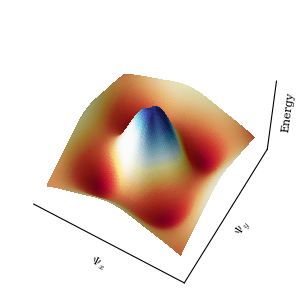

In [3]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(3+3/8, 3))

ls = LightSource(azdeg=-60, altdeg=15)
shade = ls.shade(Z, plt.cm.RdYlBu)
surf = ax.plot_surface(X+L, Y+L, Z+1, rstride=1, cstride=1, facecolors=shade, linewidth=0, antialiased=False)

ax.view_init(elev=60, azim=-60)


# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_xlabel("$\Psi_x$", labelpad=-10, usetex=True)
ax.set_xticks([])
ax.set_ylabel("$\Psi_y$", labelpad=-10, usetex=True)
ax.set_yticks([])
ax.set_zlabel("Energy", labelpad=-14)
ax.set_zticks([])

fig.tight_layout()
fig.savefig('ex_16_hat.png', dpi=1200)